In [202]:
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
features1 = pd.read_csv("adult_data.csv")
features = pd.read_csv("adult_data.csv")
features.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [203]:
features.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]
features1.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

In [204]:
features=features.drop("fnlwgt",axis=1)

In [205]:
features=features.drop("Education",axis=1)

In [206]:
features.head()

,Age,WorkClass,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


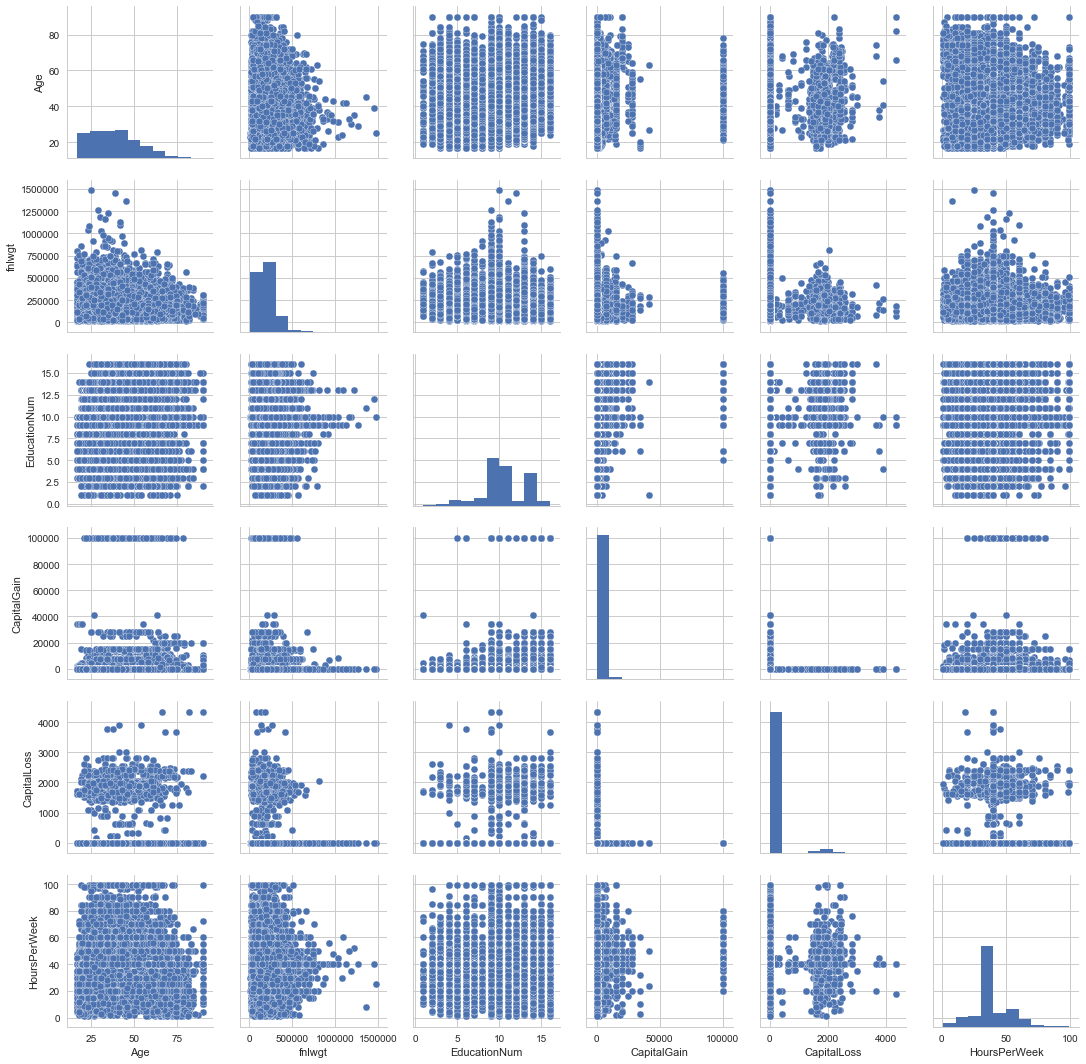

In [186]:
import seaborn as sns
sns.pairplot(features1)

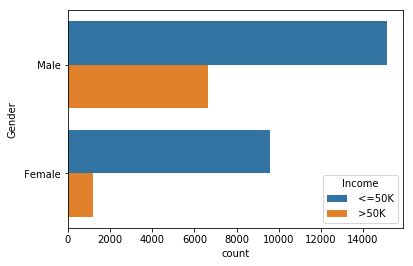

In [123]:
sns.countplot(y= features["Gender"], hue=features["Income"], data=features,)

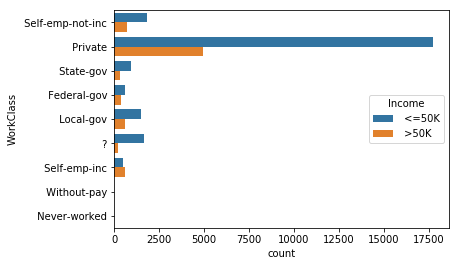

In [131]:
sns.countplot(y= features["WorkClass"], hue=features["Income"], data=features,)

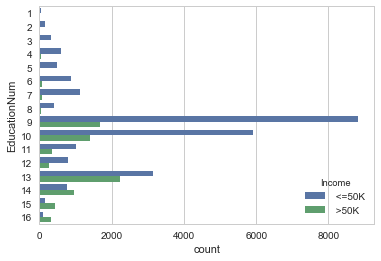

In [187]:
sns.countplot(y= features["EducationNum"], hue=features["Income"], data=features, )

/Users/salonikhasgiwala/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/salonikhasgiwala/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


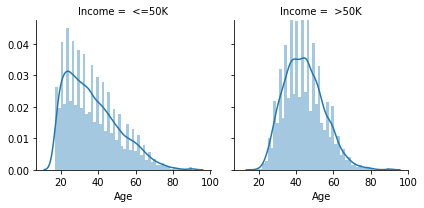

In [161]:
g = sns.FacetGrid(features, col="Income")
g = g.map(sns.distplot, "Age")


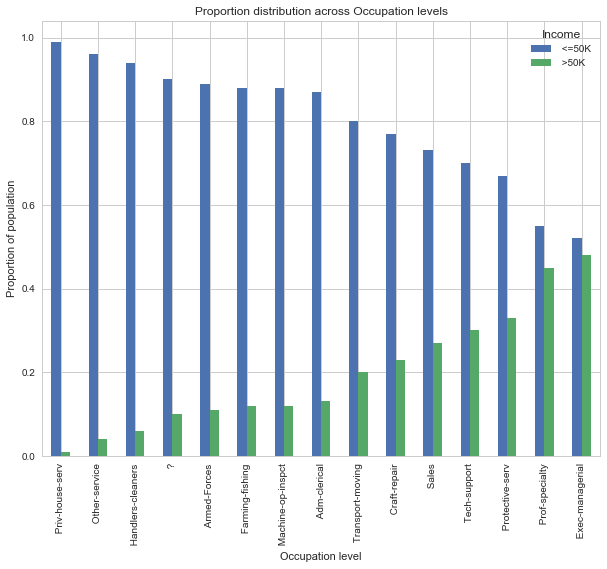

In [210]:

occupation = round(pd.crosstab(features["Occupation"], features["Income"]).div(pd.crosstab(features["Occupation"], features["Income"]).apply(sum,1),0),2)
occupation.sort_values(by = " >50K", inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

print()

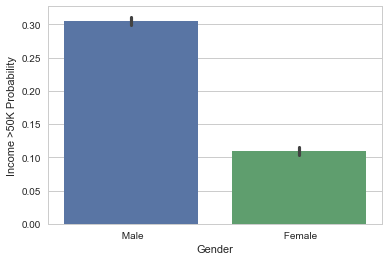

In [213]:

features["Income"]=features["Income"].map({" <=50K": 0, " >50K": 1, " <=50K.": 0, " >50K.": 1})
sns.set(style="whitegrid")

g = sns.barplot(x=features["Gender"],y=features["Income"],data=features)
g = g.set_ylabel("Income >50K Probability")


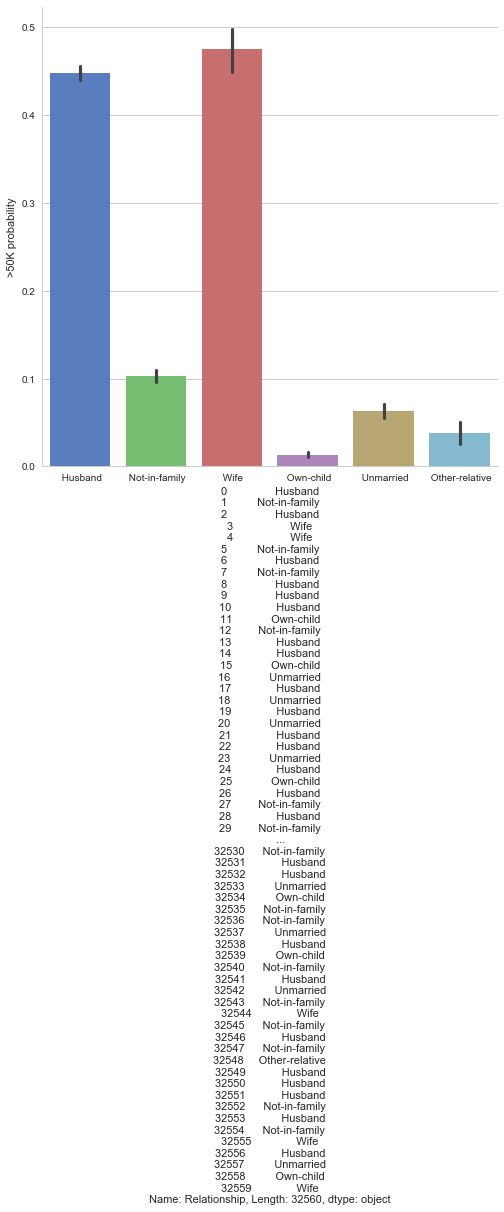

In [200]:
g = sns.factorplot(x=features["Relationship"],y=features["Income"],data=features,kind="bar",size = 17,palette = "muted")
# g.despine(left=True)
g = g.set_ylabels(">50K probability")

In [137]:
labels1 = features["Income"]
labels1 = pd.get_dummies(labels1)
labels = np.array(labels1)
# features = pd.get_dummies(features)

In [138]:
features= features.drop('Income', axis = 1)

In [139]:
feature_list = list(features.columns)

In [214]:
features.head()

,Age,WorkClass,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [141]:
features = pd.get_dummies(features)


In [228]:
count = 0
count1 = 0
count2 = 0
count3 = 0
for i,j in enumerate(features["CapitalGain"]):
    if j==0 and features["Income"][i]==0:
       count+=1 
    if j==0 and features["Income"][i]==1:
        count1+=1
    if j!=0 and features["Income"][i]==0:
        count2+=1
    if j!=0 and features["Income"][i]==1:
        count3+=1
print("0 capital gain with class 0: "+str(count))
print("0 capital gain with class 1: "+str(count1))
print("Not 0 capital gain with class 0: "+str(count2))
print("Not 0 capital gain with class 1: "+str(count3))

0 capital gain with class 0: 23685
0 capital gain with class 1: 6164
Not 0 capital gain with class 0: 1034
Not 0 capital gain with class 1: 1677


In [142]:
features = np.array(features)

In [143]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [150]:
# print('Training Features Shape:', train_features.shape)
# print('Training Labels Shape:', train_labels.shape)
# print('Testing Features Shape:', test_features.shape)
# print('Testing Labels Shape:', test_labels.shape)
print(features)

[[   50     0     0 ...     1     0     0]
 [   38     0     0 ...     1     0     0]
 [   53     0     0 ...     1     0     0]
 ...
 [   58     0     0 ...     1     0     0]
 [   22     0     0 ...     1     0     0]
 [   52 15024     0 ...     1     0     0]]


In [145]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);


In [148]:

predictions = rf.predict(test_features)


[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [149]:
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print(errors)

mape = 100 * (errors / test_labels)
# accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.19 degrees.
[[0.         0.        ]
 [0.71173333 0.71173333]
 [0.55953571 0.55953571]
 ...
 [0.82195833 0.82195833]
 [0.         0.        ]
 [0.8895     0.8895    ]]


/Users/salonikhasgiwala/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/salonikhasgiwala/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
